# Задание 1. Работа с аудиофайлами в Python (1 балл)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile as wav
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [21]:
import scipy.io.wavfile as wav

frame_rate, signal = wav.read('chord.wav')


print('Содержимое wav файла:', ', '.join(map(str, signal[:10])) + ', ...')
print(f'Частота дискретизации: {frame_rate} Hz')
print(f'Количество уровней квантования: {2 ** (8 * signal.dtype.itemsize)}')

Содержимое wav файла: 22667, 30570, 20039, 26793, 16305, 21480, 17916, 17739, 13388, 19599, ...
Частота дискретизации: 48000 Hz
Количество уровней квантования: 65536


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

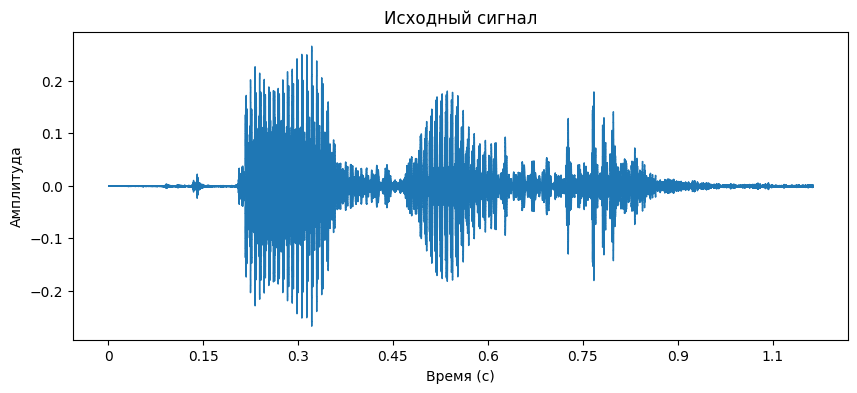

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Чтение аудиофайла
audio_path = 'my_voice.ogg'
y, sr = librosa.load(audio_path, sr=None)

# Построение формы волны исходного сигнала
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Исходный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

Audio(y, rate=sr)

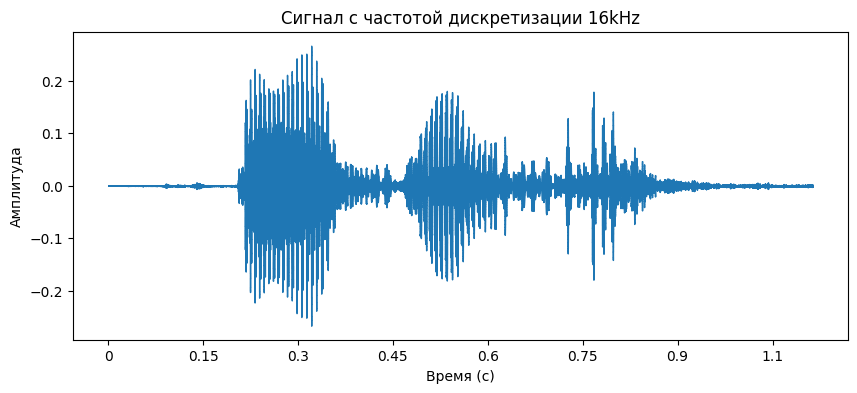

In [14]:
new_sr = 16000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=new_sr)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_resampled, sr=new_sr)
plt.title('Сигнал с частотой дискретизации 16kHz')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

Audio(y_resampled, rate=new_sr)

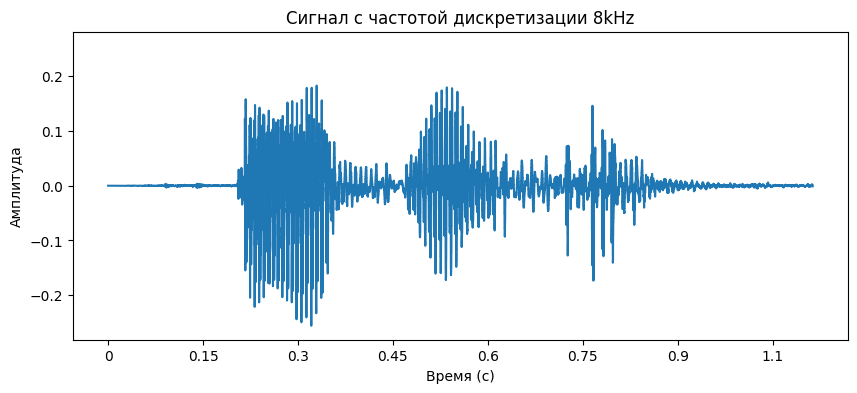

In [15]:
new_sr = 8000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=new_sr)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_resampled, sr=new_sr)
plt.title('Сигнал с частотой дискретизации 8kHz')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

Audio(y_resampled, rate=new_sr)

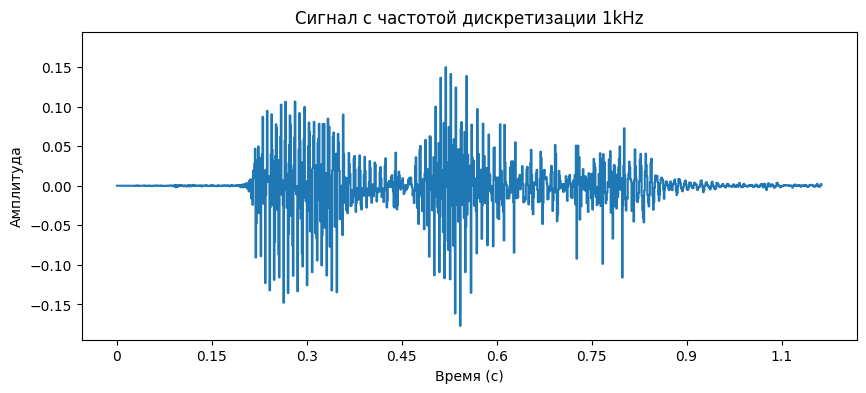

In [16]:
new_sr = 1000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=new_sr)

sf.write('audio_resampled.wav', y_resampled, new_sr)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_resampled, sr=new_sr)
plt.title('Сигнал с частотой дискретизации 1kHz')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

Audio(y_resampled, rate=new_sr)

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

In [ ]:
!pip install pydub

In [19]:
from pydub import AudioSegment
import os

AudioSegment.from_wav("chord.wav").export("chord.mp3", format="mp3")
AudioSegment.from_wav("chord.wav").export("chord.ogg", format="ogg")

<_io.BufferedRandom name='chord.ogg'>

In [20]:
file_size = os.path.getsize('chord.mp3')
print('Размер chord.mp3:', file_size, 'байт')

file_size = os.path.getsize('chord.wav')
print('Размер файла chord.wav:', file_size, 'байт')

file_size = os.path.getsize('chord.ogg')
print('Размер файла chord.ogg:', file_size, 'байт')
print('Кодеки отличаются алгоритмом сжатия, занимаемой памятью и, следсвтенно, качеством звука')

Размер chord.mp3: 32493 байт
Размер файла chord.wav: 384044 байт
Размер файла chord.ogg: 39281 байт
Кодеки отличаются алгоритмом сжаития, занимаемой памятью и, следсвтенно, качеством звука


# Задание 2. Гармонические сигналы (1 балл)

In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10,
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k',
        linewidth = 1)
    plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
    plt.show()

In [ ]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

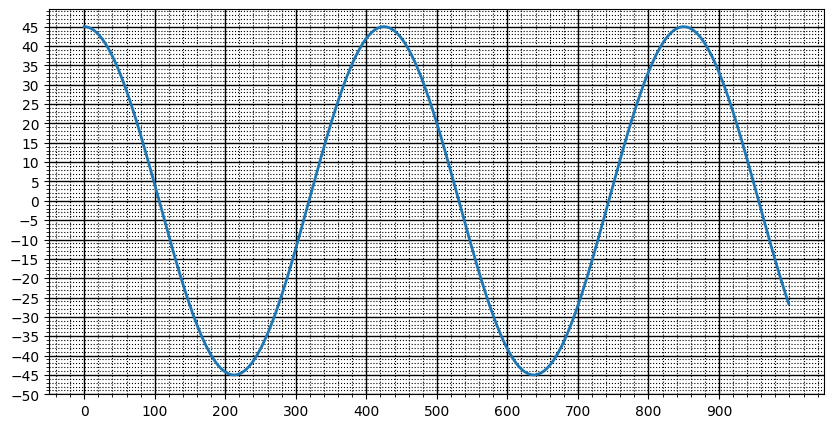

In [ ]:
draw_signal(test_data['task2']['a'])

In [ ]:
A = 45 # Amplitude
T = 425 # Period
phi = 0 # Phase shift
N = 1000 # Number of samples

t = np.arange(0, N)
omega = 2 * np.pi / T
print(f'Angular frequency: {round(omega, 3)}')

a = A * np.cos(omega * t + phi)

Angular frequency: 0.015


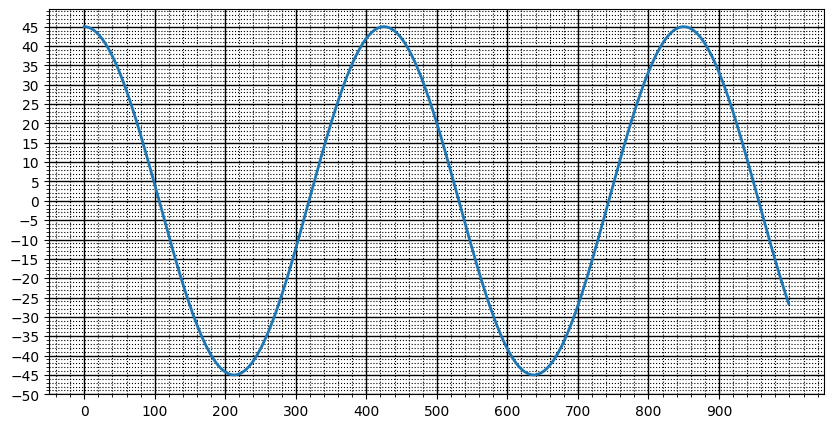

In [ ]:
draw_signal(a)

In [ ]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A=45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) =  0.015 $

3. Фаза - $\phi=0$

### Сигнал ***b***

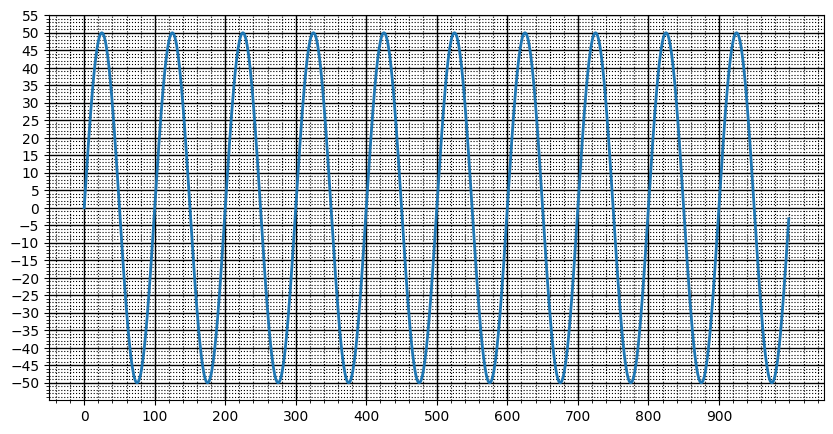

In [ ]:
draw_signal(test_data['task2']['b'])

In [ ]:
A = 50 # Amplitude
T = 100 # Period
phi = - np.pi / 2 # Phase shift
N = 1000 # Number of samples

t = np.arange(0, N)
omega = 2 * np.pi / T
print(f'Angular frequency: {round(omega, 3)}')

b = A * np.cos(omega * t + phi)

Angular frequency: 0.063


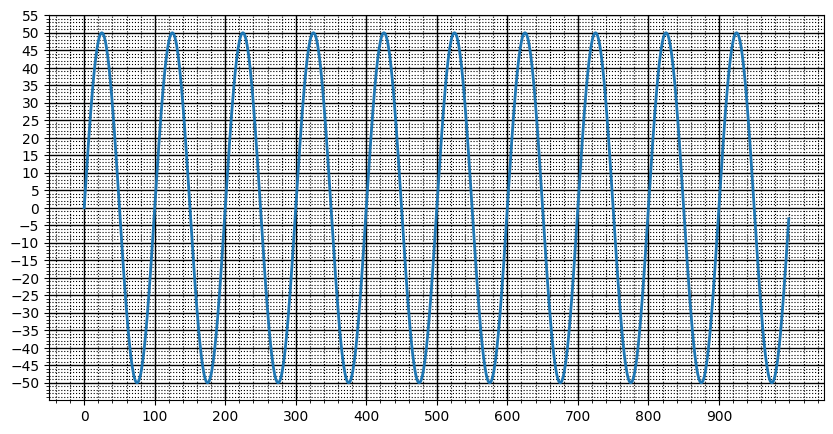

In [ ]:
draw_signal(b)

In [ ]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A=50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) =0.063 $

3. Фаза - $\phi=-\frac{\pi}{2} $

### Сигнал ***c***

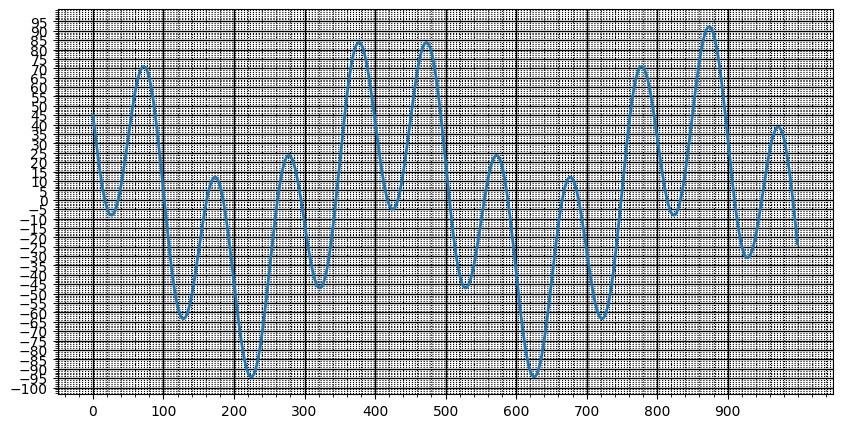

In [ ]:
draw_signal(test_data['task2']['c'])

In [ ]:
A = 45 # Amplitude
T = 425 # Period
phi = 0 # Phase shift
N = 1000 # Number of samples

t = np.arange(0, N)
omega = 2 * np.pi / T
print(f'Angular frequency: {round(omega, 3)}')

a = A * np.cos(omega * t + phi)

Angular frequency: 0.015


In [ ]:
A = 50 # Amplitude
T = 100 # Period
phi = np.pi / 2 # Phase shift
N = 1000 # Number of samples

t = np.arange(0, N)
omega = 2 * np.pi / T
print(f'Angular frequency: {round(omega, 3)}')

b = A * np.cos(omega * t + phi)

Angular frequency: 0.063


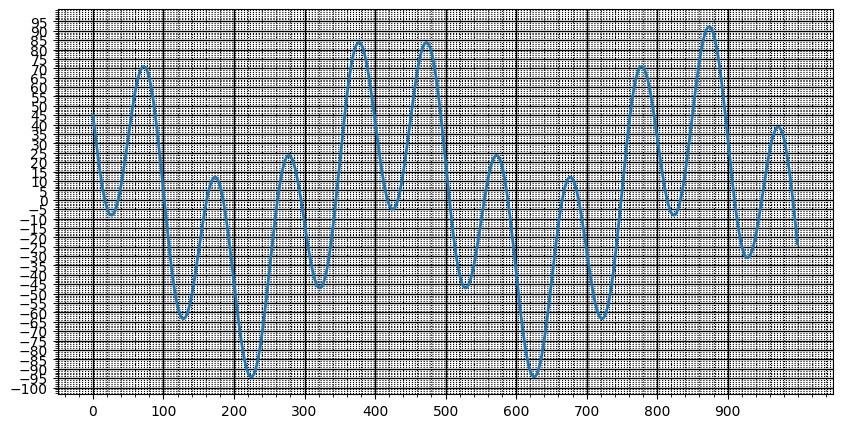

In [ ]:
draw_signal(a + b)

In [ ]:
assert len(a + b)== 1000
assert np.allclose(a + b, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

In [ ]:
def convolve(in1, in2):
    result_len = len(in1) + len(in2)
    result = [0] * (result_len - 1)
    for i in range(len(in1)):
        for j in range(len(in2)):
            result[i + j] += in1[i] * in2[j]
    return result

In [ ]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [ ]:
a = np.repeat([0, 1, 0], 10)
b = np.array([0, 1, 2, 3, 2, 1, 0])

In [ ]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

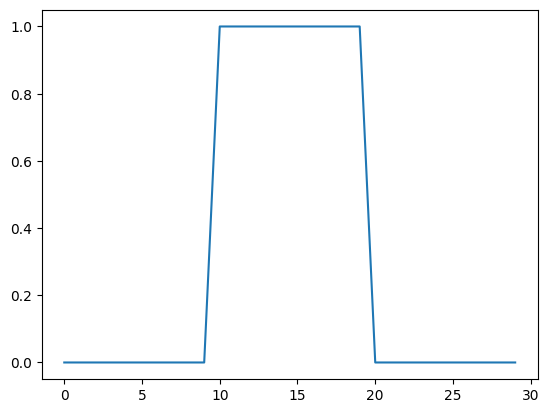

In [ ]:
_ = plt.plot(a)

Сигнал **b**

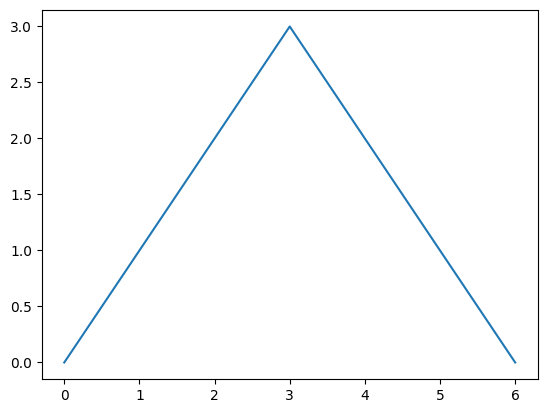

In [ ]:
_ = plt.plot(b)

Свертка **a** и **b**

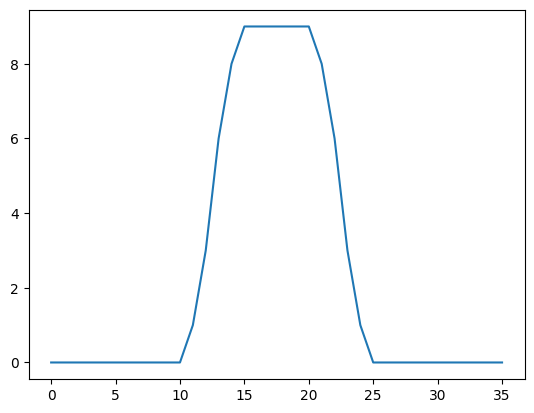

In [ ]:
_ = plt.plot(convolve(a, b))

Все 3 графика на одной картинке:

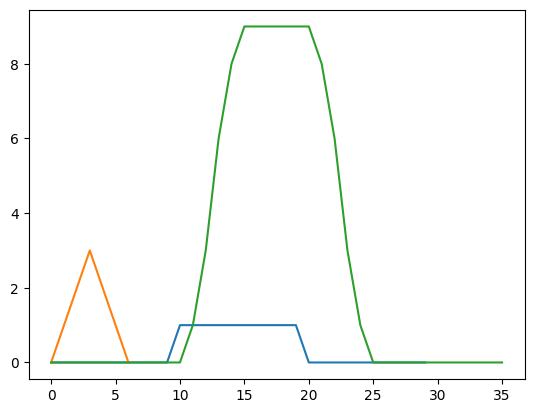

In [ ]:
_ = plt.plot(a)
_ = plt.plot(b)
_ = plt.plot(convolve(a, b))

# Задание 4. * Алгоритм Карплуса-Стронга

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат.

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise
    y = np.zeros(N)
    y[:len(noise)] = noise

    for i in range(len(noise), N):
        y[i] = 0.5 * (y[i - len(noise)] + y[i - len(noise) - 1])

    return y

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
guitar = karplus_strong(noise, 10000)

Визуализируем затухание амплитуды:

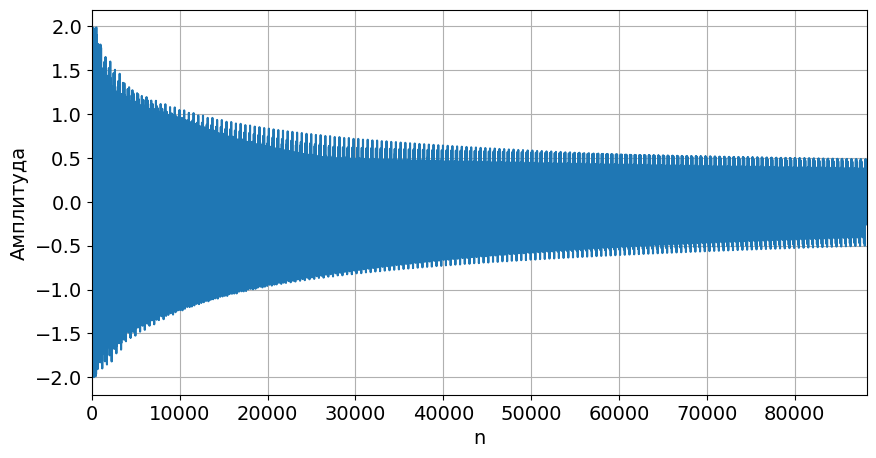

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

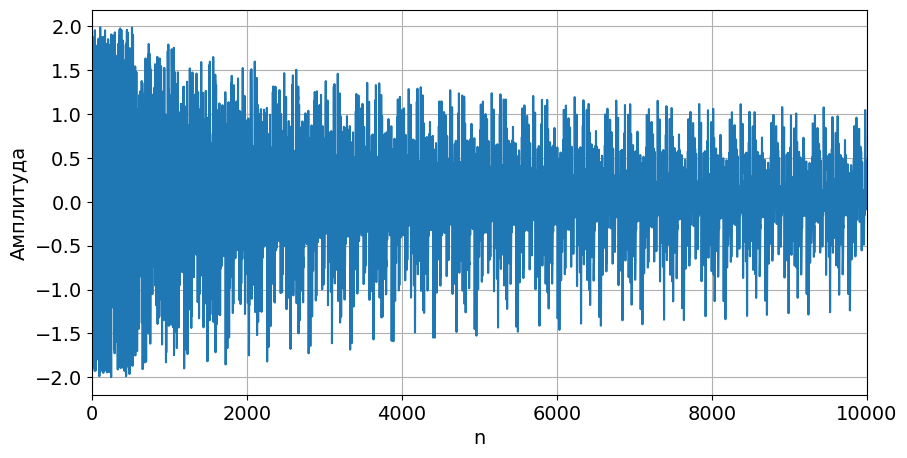

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, 10000)
plt.plot(guitar)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()